This is an image classification problem on imagewoof dataset from 'fastai' datasets.

In [93]:
!pip install jovian --upgrade --quiet

In [ ]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

Let's downloade the dataset.

In [94]:
project_name = 'Course project- imagewoof'

In [ ]:
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/imagewoof-160.tgz"
download_url(dataset_url, '.')

# extract the archive

with tarfile.open('./imagewoof-160.tgz', 'r:gz') as tar: #read file in r mode
  tar.extractall(path = './data') #extract all folders from zip file and store under folder named data

In [97]:
jovian.commit(project=project_name, environment=None)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/ch19b034/course-project-imagewoof


'https://jovian.ai/ch19b034/course-project-imagewoof'

In [8]:
from torchvision.transforms import ToTensor 
import torchvision.transforms as transforms

In [9]:
data_dir = './data/imagewoof-160'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + '/train')
print(classes)

['val', 'train']
['n02099601', 'n02088364', 'n02093754', 'n02087394', 'n02089973', 'n02105641', 'n02096294', 'n02115641', 'n02086240', 'n02111889']


In [10]:
print(os.listdir(data_dir + '/val'))

['n02099601', 'n02088364', 'n02093754', 'n02087394', 'n02089973', 'n02105641', 'n02096294', 'n02115641', 'n02086240', 'n02111889']


In [11]:
print(len(os.listdir(data_dir + '/val')))

10


In [12]:
print(len(os.listdir(data_dir + '/train')))

10


The classes of this dataset (both train and test) are not the names of the dog breeds. So, I have created a list named 'classses' which has the actual names. I got these names from this website: (https://github.com/fastai/imagenette).

In [13]:
classes = ['Australian terrier', 'Border terrier', 'Samoyed', 'Beagle', 'Shih-Tzu', 'English foxhound', 'Rhodesian ridgeback', 'Dingo', 'Golden retriever', 'Old English sheepdog']
len(classes)

10

In [14]:
dir = './data/imagewoof-160/train/n02105641'
list = os.listdir(dir) 
print(len(list))
print(list)

1300
['n02105641_778.JPEG', 'n02105641_3058.JPEG', 'n02105641_1323.JPEG', 'n02105641_606.JPEG', 'n02105641_3599.JPEG', 'n02105641_6020.JPEG', 'n02105641_9440.JPEG', 'n02105641_5374.JPEG', 'n02105641_14038.JPEG', 'n02105641_4626.JPEG', 'n02105641_5795.JPEG', 'n02105641_277.JPEG', 'n02105641_5553.JPEG', 'n02105641_6350.JPEG', 'n02105641_3364.JPEG', 'n02105641_817.JPEG', 'n02105641_1254.JPEG', 'n02105641_324.JPEG', 'n02105641_13015.JPEG', 'n02105641_3952.JPEG', 'n02105641_1839.JPEG', 'n02105641_3615.JPEG', 'n02105641_5724.JPEG', 'n02105641_9542.JPEG', 'n02105641_3406.JPEG', 'n02105641_4175.JPEG', 'n02105641_2665.JPEG', 'n02105641_10967.JPEG', 'n02105641_8809.JPEG', 'n02105641_2092.JPEG', 'n02105641_4134.JPEG', 'n02105641_14139.JPEG', 'n02105641_6585.JPEG', 'n02105641_12432.JPEG', 'n02105641_6732.JPEG', 'n02105641_3854.JPEG', 'n02105641_14270.JPEG', 'n02105641_5823.JPEG', 'n02105641_1869.JPEG', 'n02105641_357.JPEG', 'n02105641_4893.JPEG', 'n02105641_2185.JPEG', 'n02105641_12686.JPEG', 'n02

In [15]:
train_dir = './data/imagewoof-160/train'
test_dir = './data/imagewoof-160/val'

For getting train and test dataset size, we load the images as a single train and test folders.

In [16]:
image_size_train = ImageFolder(train_dir,transform=ToTensor())
image_size_test = ImageFolder(test_dir,transform=ToTensor())

In [17]:
len(image_size_train)

12454

In [18]:
len(image_size_test)

500

In [19]:
imgcount = 0
for img,_ in image_size_train:
  imgcount += 1
  print(img.shape)
  if imgcount==10:
    break

torch.Size([3, 160, 213])
torch.Size([3, 160, 213])
torch.Size([3, 213, 160])
torch.Size([3, 160, 213])
torch.Size([3, 160, 192])
torch.Size([3, 160, 211])
torch.Size([3, 160, 219])
torch.Size([3, 213, 160])
torch.Size([3, 160, 213])
torch.Size([3, 160, 213])


As you can see, the shape of the images corresponding to each class of the train dataset are varrying from one class to other.

In [20]:
print(image_size_train.classes)
print(len(image_size_train.classes))

['n02086240', 'n02087394', 'n02088364', 'n02089973', 'n02093754', 'n02096294', 'n02099601', 'n02105641', 'n02111889', 'n02115641']
10


In [21]:
imgcount = 0
for img,_ in image_size_test:
  imgcount += 1
  print(img.shape)
  if imgcount==10:
    break

torch.Size([3, 166, 160])
torch.Size([3, 160, 200])
torch.Size([3, 160, 213])
torch.Size([3, 160, 213])
torch.Size([3, 160, 213])
torch.Size([3, 160, 213])
torch.Size([3, 160, 213])
torch.Size([3, 160, 213])
torch.Size([3, 187, 160])
torch.Size([3, 160, 182])


The same kind of situation can seen for test dataset also. S0, we resize the imaghes of both test and train dataset.

In [22]:
transform_ = transforms.Compose([transforms.Resize((160, 160)), transforms.ToTensor()])

In [23]:
train_dataset = ImageFolder(train_dir,transform=transform_)
test_dataset = ImageFolder(test_dir,transform=transform_)

In [24]:
imgcount = 0
for img,_ in train_dataset:
  imgcount += 1
  print(img.shape)
  if imgcount==10:
    break

torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])


In [25]:
imgcount = 0
for img,_ in test_dataset:
  imgcount += 1
  print(img.shape)
  if imgcount==10:
    break

torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])


Now shapes of all the images are equal to [3, 160, 160]. I chose to transform the iamges to 160x160 as it is the lest dimension among the two dimensions of each image for all the images in both test and train datasets.

In [26]:
img,label = train_dataset[1001]
print(img.shape, classes[label])


torch.Size([3, 160, 160]) Australian terrier


In [27]:
def show_example(img,label):
  print('Label: ', classes[label], '('+str(label)+')')
  plt.imshow(img.permute(1, 2, 0))

In [28]:
classes_dict = dict(zip(train_dataset.classes, classes))
classes_dict

{'n02086240': 'Australian terrier',
 'n02087394': 'Border terrier',
 'n02088364': 'Samoyed',
 'n02089973': 'Beagle',
 'n02093754': 'Shih-Tzu',
 'n02096294': 'English foxhound',
 'n02099601': 'Rhodesian ridgeback',
 'n02105641': 'Dingo',
 'n02111889': 'Golden retriever',
 'n02115641': 'Old English sheepdog'}

Label:  Australian terrier (0)


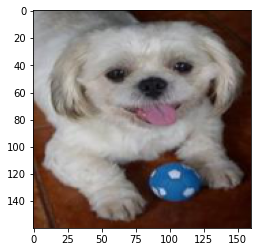

In [29]:
show_example(*train_dataset[10])

Label:  Old English sheepdog (9)


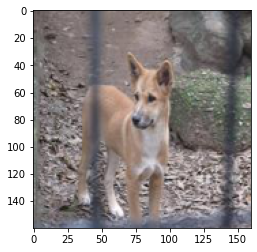

In [30]:
show_example(*test_dataset[499])

##Transforming the dataset.

We transform the train and test datasets using train_tfms and valid_tfms defined below.
Transformation is necessary so that the model doesn't learn specific features of an image which results in poor performance on the test data.

In [31]:
stats = ((0.419, 0.4882, 0.44565), (0.2023, 0.1994, 0.2010))

train_tfms = tt.Compose([tt.RandomCrop(160, padding=4, padding_mode='reflect'),
                         tt.RandomHorizontalFlip(),
                         tt.ToTensor(),
                         tt.Normalize(*stats,inplace=True)])
valid_tfms = tt.Compose([tt.RandomCrop(160),tt.ToTensor(),tt.Normalize(*stats)])

The transformation includes padding the images with 4 grids (2D) on all the sides of the image with reflect mode and fliping the images randomly along a horizontal axis. Finally, transforming the images to tensors and normalizing them. 

In [32]:
train_ds = ImageFolder(train_dir, train_tfms)
test_ds = ImageFolder(test_dir, valid_tfms)

In [33]:
imgcount = 0
for img,_ in test_ds:
  imgcount += 1
  print(img.shape)
  if imgcount==10:
    break

torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])
torch.Size([3, 160, 160])


In [34]:
len(train_ds)

12454

In [35]:
len(test_ds)

500

In [36]:
random_seed = 42
torch.manual_seed(random_seed);

Now we divide the train_ds into data_train and data_val with lenght of validation dataset = 1000.

In [37]:
val_size = 1000
train_size = len(train_ds) - val_size

data_train, data_val = random_split(train_ds, [train_size, val_size])
len(data_train), len(data_val)

(11454, 1000)

Now divide the train and validation datasets into data loaders of batch size 64.

In [38]:
batch_size = 64
train_dl = DataLoader(data_train, batch_size, shuffle = True, num_workers= 4, pin_memory=True)
val_dl = DataLoader(data_val, batch_size*2, num_workers=4, pin_memory=True)


In [39]:
def denormalization(imgs, means, stds):
  means = torch.tensor(means).reshape(1,3,1,1)
  stds = torch.tensor(stds).reshape(1,3,1,1)
  return imgs*stds + means
def show_batch(dl):
  for img,labels in dl:
    fig, ax = plt.subplots(figsize=(12,12))
    ax.set_xticks([]); ax.set_yticks([])
    denorm_images = denormalization(img, *stats)
    ax.imshow(make_grid(denorm_images[:64],nrow=8).permute(1,2,0).clamp(0,1))
    break

Before printing the images, we denormalize the images so that the colors won't look distorted.

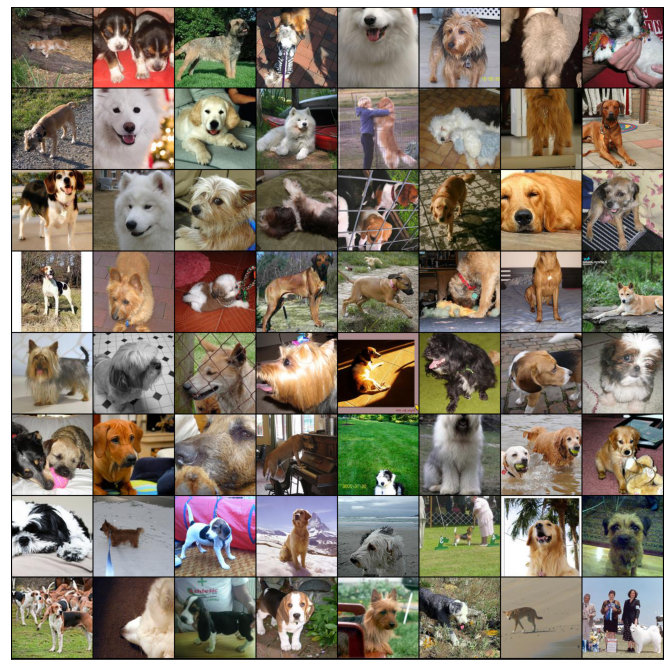

In [40]:
show_batch(train_dl)

In [84]:
jovian.commit(project=project_name, environment=None)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/ch19b034/course-project-imagewoof


'https://jovian.ai/ch19b034/course-project-imagewoof'

## Model Building 

In [79]:
import os
os.environ['my_path'] = '/content/imagewoof-resnet9.pth'

In [80]:
!pwd

/content


In [81]:
!mkdir my_path

mkdir: cannot create directory ‘my_path’: File exists


In [82]:
%cd /content/imagewoof-resnet9.pth

[Errno 20] Not a directory: '/content/imagewoof-resnet9.pth'
/content


I chose to build a ResNet9 model. 

In [50]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [51]:
def conv_block(in_channels, out_channels, pool=False):
  layers = [nn.Conv2d(in_channels, out_channels,kernel_size=3,padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)]
  if pool : layers.append(nn.MaxPool2d(2))
  return nn.Sequential(*layers) 

class ResNet9(ImageClassificationBase):
  def __init__(self, in_channels, num_classes):
    super().__init__()

    self.conv1 = conv_block(in_channels, 64)
    self.conv2 = conv_block(64, 128, pool=True)
    self.res1 = nn.Sequential(conv_block(128, 128),conv_block(128,128))
    
    self.conv3 = conv_block(128,256,pool=True)
    self.conv4 = conv_block(256,512,pool=True)
    self.res2 = nn.Sequential(conv_block(512, 512),conv_block(512,512))

    self.classifier = nn.Sequential(nn.MaxPool2d(4),nn.Flatten(),nn.Dropout(0.2),nn.Linear(512*5*5,num_classes))
  def forward(self, xb):
    out = self.conv1(xb)
    out = self.conv2(out)
    out = self.res1(out)+out
    out = self.conv3(out)
    out = self.conv4(out)
    out = self.res2(out)+out
    out = self.classifier(out)
    return out

In [52]:
model = ResNet9(3,10)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

##Using GPU

In [53]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, type(list)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [54]:
# checking which device is available

device = get_default_device()
device

device(type='cuda')

Loading train and validation datasets into the device i.e., GPU in this case.

In [55]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)

model=to_device(model, device);

##Training the model

In [56]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

###Evaluting the model on validation dataset.

In [57]:
history = [evaluate(model, val_dl)]
history

[{'val_acc': 0.10434194654226303, 'val_loss': 2.305704116821289}]

In [58]:
epochs = 8
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [59]:
history += fit_one_cycle(epochs, max_lr, model, train_dl, val_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00394, train_loss: 3.8797, val_loss: 15.5106, val_acc: 0.1390
Epoch [1], last_lr: 0.00935, train_loss: 3.0271, val_loss: 1.9512, val_acc: 0.3062
Epoch [2], last_lr: 0.00972, train_loss: 1.9585, val_loss: 1.8891, val_acc: 0.3316
Epoch [3], last_lr: 0.00812, train_loss: 1.8627, val_loss: 1.7815, val_acc: 0.3707
Epoch [4], last_lr: 0.00556, train_loss: 1.7687, val_loss: 1.6878, val_acc: 0.4183
Epoch [5], last_lr: 0.00283, train_loss: 1.6558, val_loss: 1.5938, val_acc: 0.4361
Epoch [6], last_lr: 0.00077, train_loss: 1.5314, val_loss: 1.4962, val_acc: 0.4658
Epoch [7], last_lr: 0.00000, train_loss: 1.4474, val_loss: 1.4292, val_acc: 0.4999


In [60]:
history += fit_one_cycle(epochs, max_lr, model, train_dl, val_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00394, train_loss: 1.6529, val_loss: 2.7015, val_acc: 0.3955
Epoch [1], last_lr: 0.00935, train_loss: 2.0520, val_loss: 2.8043, val_acc: 0.2975
Epoch [2], last_lr: 0.00972, train_loss: 1.8931, val_loss: 11.9016, val_acc: 0.2065
Epoch [3], last_lr: 0.00812, train_loss: 1.6190, val_loss: 1.6330, val_acc: 0.4312
Epoch [4], last_lr: 0.00556, train_loss: 1.5907, val_loss: 1.3858, val_acc: 0.5122
Epoch [5], last_lr: 0.00283, train_loss: 1.3786, val_loss: 1.2836, val_acc: 0.5690
Epoch [6], last_lr: 0.00077, train_loss: 1.2356, val_loss: 1.2000, val_acc: 0.5888
Epoch [7], last_lr: 0.00000, train_loss: 1.1336, val_loss: 1.1657, val_acc: 0.5929


In [61]:
history += fit_one_cycle(epochs, max_lr, model, train_dl, val_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00394, train_loss: 1.2668, val_loss: 1.3707, val_acc: 0.5541
Epoch [1], last_lr: 0.00935, train_loss: 1.3927, val_loss: 1.6871, val_acc: 0.4636
Epoch [2], last_lr: 0.00972, train_loss: 1.5854, val_loss: 1.5277, val_acc: 0.4561
Epoch [3], last_lr: 0.00812, train_loss: 1.3515, val_loss: 1.3431, val_acc: 0.5392
Epoch [4], last_lr: 0.00556, train_loss: 1.2405, val_loss: 1.2942, val_acc: 0.5717
Epoch [5], last_lr: 0.00283, train_loss: 1.1318, val_loss: 1.1100, val_acc: 0.6127
Epoch [6], last_lr: 0.00077, train_loss: 1.0209, val_loss: 1.0064, val_acc: 0.6535
Epoch [7], last_lr: 0.00000, train_loss: 0.9271, val_loss: 0.9390, val_acc: 0.6773


##Ploting accuries, losses and learning rates.

In [62]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

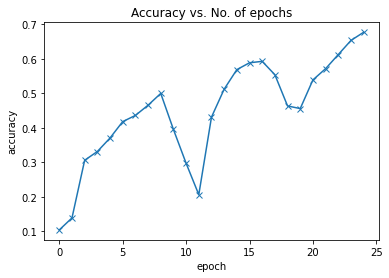

In [63]:
plot_accuracies(history)

In [64]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

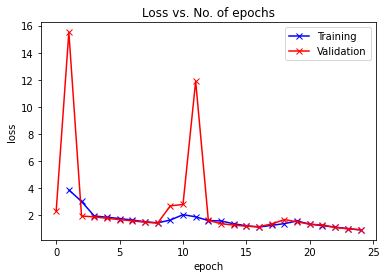

In [65]:
plot_losses(history)

We get two extreme peaks for losses on validation dataset when compared to the graph of train dataset. This is because at the 1st and 11th epoch the model was over fitting ajnd later on the model doesn't over fit or under fit as we further continued training the model for another 13 epochs. 

In [66]:
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

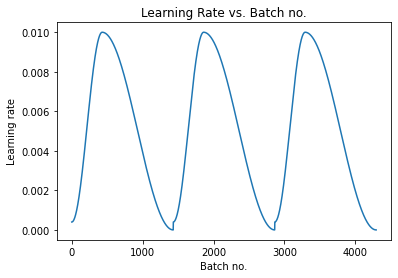

In [67]:
plot_lrs(history)

##Predicting the images of dataset test_ds.

In [68]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return classes[preds[0].item()]

Label: Australian terrier , Predicted: Australian terrier


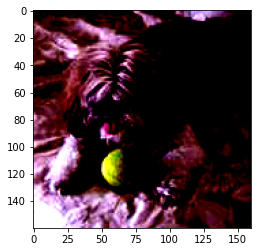

In [69]:
img, label = test_ds[0]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', classes[label], ', Predicted:', predict_image(img, model))

Label: Beagle , Predicted: Samoyed


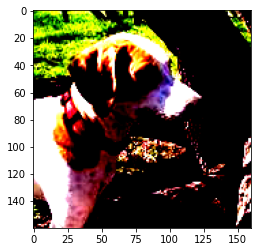

In [70]:
img, label = test_ds[190]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', classes[label], ', Predicted:', predict_image(img, model))

Label: Australian terrier , Predicted: Australian terrier


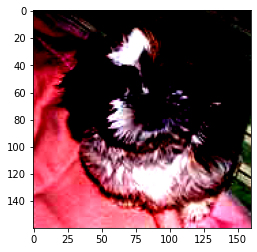

In [71]:
img, label = test_ds[1]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', classes[label], ', Predicted:', predict_image(img, model))

Evaluating the model on test images. 

In [76]:
test_loader = DeviceDataLoader(DataLoader(test_ds, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_acc': 0.6518049240112305, 'val_loss': 0.9777167439460754}

Hence, val_ac = 67% and test_acc = 65% which are quit close to each other. Hence, the performance of the model is quit good.

##Logging the hyperparametres and saving the project.

In [88]:
torch.save(model.state_dict(), 'imagewoof-resnet9.pth')

In [87]:
jovian.reset()
jovian.log_hyperparams(arch='resnet9', 
                       epochs=epochs, 
                       lr=max_lr, 
                       scheduler='one-cycle', 
                       weight_decay=weight_decay, 
                       grad_clip=grad_clip,
                       opt=opt_func.__name__)

[jovian] Hyperparams logged.


In [86]:
jovian.log_metrics(val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'],
                   train_loss=history[-1]['train_loss'],
                   test_loss = result['val_loss'], 
                   test_acc = result['val_acc']
                   )

[jovian] Metrics logged.


In [98]:
jovian.commit(project=project_name, environment=None, outputs=['imagewoof-resnet9.pth'])

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional outputs...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/ch19b034/course-project-imagewoof


'https://jovian.ai/ch19b034/course-project-imagewoof'

##Summary


1.   To classify the images of the dataset imageswoof, I've used ResNet9 neural network which has two residual blocks. 

2.   While training the model, I added delay to the weights of the model and instead of using a constant learning rate I used a learning rate scheduler which is set to one-cycle.

3.   Hyperparameters I have used are epochs = 8,
max_lr = 0.01,
grad_clip = 0.1,
weight_decay = 1e-4,
opt_func = torch.optim.Adam .

4.   The model also has a batch normalization layer wich helps in decreasing the varaince of the parameters so that training process will be easier and faster. Before applying the linear we drop out some of the nodes in the neural network to avoid overfitting over the train data.

5.   Finally after 24 epochs, the we got a validation accuracy of 67% and test accuracy 65% which indicates that the model performed pretty well.











##Future Work regarding this project


1.   Further, we can try to increase the accuracy to more than 70% which can achieved by tuning the hypermaters or by choosing a different model.
2.   I also want to work on similar kind of datasets to check how good this model would perform on that dataset.



## Reference



*   https://jovian.ai/aakashns/simple-cnn-starter
*   https://jovian.ai/aakashns/05b-cifar10-resnet



In [95]:
jovian.commit(project=project_name, environment=None)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/ch19b034/course-project-imagewoof


'https://jovian.ai/ch19b034/course-project-imagewoof'